# Project AI

Import required sources.

In [1]:
%pylab inline
import torch
from torchvision import datasets, transforms
from torch.autograd import Variable
from torch import nn, optim
from VAE import *
from train import *
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Run Gaussian model

In [2]:
# set hyperparameters
latent_dim = 2
batch_size = 20
epochs = 2

# Load data
train_data = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size, shuffle=True, **{})

# VAE_concrete, loss_concrete = run_train(latent_dim, epochs, 'Gumbel', train_loader, 1e-3)
VAE_Gaussian, loss_Gaussian = run_train(latent_dim, epochs, 'Gaussian', train_loader, 1e-3)
# VAE_logit, loss_logit = run_train(latent_dim, epochs, 'logit', train_loader, 1e-3)

tensor(11098.3682)
Train Epoch: 1 [0/60000 (0%)]	Loss: 554.371643
tensor(10728.9033)
tensor(10108.4492)
tensor(9679.0908)
tensor(9068.7852)
tensor(8587.5459)
tensor(8047.1689)
tensor(7554.6699)
tensor(6913.5000)
tensor(6523.8589)
tensor(5925.6382)
tensor(5550.9072)
tensor(5618.3501)
tensor(5265.0024)
tensor(5030.6323)
tensor(4610.4385)
tensor(4862.9033)
tensor(4214.8228)
tensor(4903.4131)
tensor(4270.4824)
tensor(4069.6301)
tensor(4601.1821)
tensor(4218.0723)
tensor(5319.1162)
tensor(4997.2544)
tensor(4352.1807)
tensor(4789.3862)
tensor(5672.0864)
tensor(5849.7695)
tensor(4276.8501)
tensor(6248.9531)
tensor(8712.9062)
tensor(5733.4355)
tensor(6420.2212)
tensor(5841.1470)
tensor(5188.5347)
tensor(4241.3740)
tensor(6530.6890)
tensor(6489.3828)
tensor(5939.4248)
tensor(5399.0444)
tensor(7348.8892)
tensor(5064.5181)
tensor(4557.8975)
tensor(5214.0776)
tensor(5335.2915)
tensor(4587.4810)
tensor(4663.9268)
tensor(4501.6406)
tensor(4899.3359)
tensor(5891.5474)
tensor(4931.1948)
tensor(4445.24

tensor(4182.3379)
tensor(4281.3379)
tensor(3793.9026)
tensor(4083.0020)
tensor(3860.8115)
tensor(3794.3098)
tensor(4377.3374)
tensor(4459.6084)
tensor(4343.8179)
tensor(3920.7610)
tensor(3944.5312)
tensor(4216.4229)
tensor(4031.0518)
tensor(4337.7104)
tensor(4164.1602)
tensor(4161.9331)
tensor(4093.7112)
tensor(4389.8081)
tensor(4165.5444)
tensor(4269.5737)
tensor(4327.6562)
tensor(4170.6919)
tensor(4057.0569)
tensor(4108.7920)
tensor(3895.5188)
tensor(4136.7778)
tensor(4131.8550)
tensor(3983.0972)
tensor(4267.9609)
tensor(4289.1099)
tensor(4347.8887)
tensor(3955.9033)
tensor(4164.5615)
tensor(4000.5686)
tensor(4236.6704)
tensor(3935.0947)
tensor(3999.1724)
tensor(4148.8130)
tensor(4152.9873)
tensor(4069.5505)
tensor(4359.7036)
tensor(3969.0625)
tensor(4001.6658)
tensor(3908.7095)
tensor(3856.2439)
tensor(4544.8823)
tensor(3893.3564)
tensor(4041.7930)
tensor(3859.9604)
tensor(4004.7979)
tensor(3951.6528)
tensor(4331.3696)
tensor(3987.3928)
tensor(4364.2617)
tensor(4032.3228)
Train Epoc

KeyboardInterrupt: 

## Plot of losses

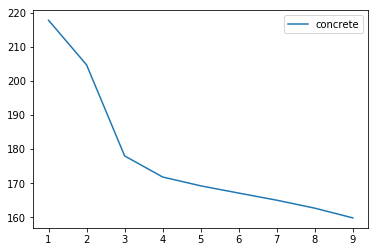

In [3]:
epoch_space = np.linspace(1,9,9)
# plt.plot(epoch_space, loss_Gaussian, label='Gaussian')
# plt.plot(epoch_space, loss_logit, label='logit')
plt.plot(epoch_space, loss_concrete, label='concrete')
plt.legend()
plt.show()

## 2-D scatterplot

In [4]:
def find_latent_coordinates(train_loader_scatter_plot, model):
    
    x_coordinates = defaultdict(lambda: [])
    y_coordinates = defaultdict(lambda: [])
    
    for batch_idx, (data, label) in enumerate(train_loader_scatter_plot):
        _, z, _ = model(data)
        index = label.data.cpu().numpy()[0]
        
        x_coordinates[index].append(z.data.cpu().numpy()[0][0])
        y_coordinates[index].append(z.data.cpu().numpy()[0][1])
        
        if batch_idx == 10000:
            break
            
    return x_coordinates, y_coordinates

In [5]:
import collections
from collections import *

# Reconstructed
train_data_scatter_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_scatter_plot = torch.utils.data.DataLoader(train_data_scatter_plot,
                                           batch_size=1, shuffle=False, **{})

# x_latent_space_Gaussian, y_latent_space_Gaussian = find_latent_coordinates(train_loader_scatter_plot, VAE_Gaussian)
# x_latent_space_logit, y_latent_space_logit = find_latent_coordinates(train_loader_scatter_plot, VAE_logit)
x_latent_space_Gumbel, y_latent_space_Gumbel = find_latent_coordinates(train_loader_scatter_plot, VAE_concrete)



In [ ]:
for label in x_latent_space_Gumbel:
#     print(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label])
    plt.scatter(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label], marker='.')
plt.show()

# for item in VAE_concrete.parameters():
#     print(item.data)

In [5]:
for label in x_latent_space_Gaussian:
    plt.scatter(x_latent_space_Gaussian[label], y_latent_space_Gaussian[label], marker='.')
plt.show()

NameError: name 'x_latent_space_Gaussian' is not defined

In [6]:
for label in x_latent_space_logit:
    plt.scatter(x_latent_space_logit[label], y_latent_space_logit[label], marker='.')
plt.show()

NameError: name 'x_latent_space_logit' is not defined

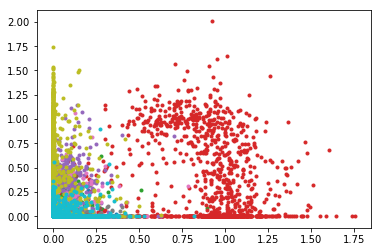

In [6]:
for label in x_latent_space_Gumbel:
#     print(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label])
    plt.scatter(x_latent_space_Gumbel[label], y_latent_space_Gumbel[label], marker='.')
plt.show()

# for item in VAE_concrete.parameters():
#     print(item.data)

## 2-D plot of models

In [ ]:
### Let's check if the reconstructions make sense
# Set model to test mode
VAE_MNIST.eval()
    
# Reconstructed
train_data_plot = datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor())

train_loader_plot = torch.utils.data.DataLoader(train_data_plot,
                                           batch_size=1, shuffle=False, **{})

for batch_idx, (data, _) in enumerate(train_loader_plot):
    x_hat, mu, logvar = VAE_MNIST(data)
    plt.imshow(x_hat.view(1,28,28).squeeze().data.numpy(), cmap='gray')
    plt.title('%i' % train_data.train_labels[batch_idx])
    plt.show()
    if batch_idx == 3:
        break